# **CIS 545 FINAL PROJECT:**
# **PREDICTING THE WORLD SERIES WINNER USING BASEBALL DATA**

**Project by Nigel Newby, Lucien Peach, and Kaiwen Hu**


What factors distinguish winning baseball teams from losing baseball teams? Things like ERA, batting average, and hits are all integral to the success of a baseball team within a single game and throughout a season, but how important is each factor compared to the others? Can these factors be used to predict the MLB playoff picture? Can they predict the winner of the World Series?

These are the questions that we're seeking to answer in our analysis. We want to explore some of these crucial factors that can contribute to a team winning the World Series in a given year and make a model that can predict the probability of a certain team winning the World Series. 

# **Imports**

We begin by importing the packages we need to perform our analysis, such as Pandas and SciKit-Learn.

In [ ]:
# import packages needed for analysis

import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import xgboost as xgb

# **Regular Season Analysis**

We begin by analyzing regular season game data from 1871-2022 (inclusive) to develop a model which can create MLB team power rankings for the regular season given regular season team statistics. The model predicts a team's probability of winning an arbitrary game based on their performance in various metrics during that year. Using these probabilities, we are able to compile power rankings by ordering the teams descending order of their likelihood to win an arbitrary game. 

## **Data Loading**

For the purposes of this project, we will be analyzing game-by-game data gathered from the Retrosheet database (https://www.retrosheet.org/gamelogs/index.html).

This dataset includes 161 fields for each game. These fields were parsed according to the glfields.txt file (https://www.retrosheet.org/gamelogs/glfields.txt) and assigned column headers accordingly. These column headers are included in the all_columns list and are subsequently applied to each dataset.

The game-by-game data from each year is then concatenated into a cumulative Dataframe of size (226202, 161). This Dataframe contains information about every recorded regular season game in MLB history.

In [ ]:
all_columns = ["Date", "Number of Game", "Day of Week", "Visiting Team", "Visting Team League", 
     "Visiting Team Game Number", "Home Team", "Home Team League", "Home Team Game Number", 
     "Visiting Score", "Home Score", "Length of Game in Outs", "Day or Night", "Completion Information", 
     "Forfeit Information", "Protest Information", "Park ID", "Attendance", "Time of Game (minutes)", 
     "Visiting Line Score", "Home Line Score", 
     "Visiting At-Bats", "Visiting Hits", "Visiting Doubles", "Visiting Triples", "Visiting Home Runs", 
     "Visiting RBI", "Visiting Sacrifice Hits", "Visiting Sacrifice Flies", "Visiting Hit-by-Pitch", 
     "Visiting Walks", "Visiting Intentional Walks", "Visiting Strikeouts", "Visiting Stolen Bases", 
     "Visiting Caught Stealing", "Visiting Grounded into Double Plays", 
     "Visiting Awarded First on Catcher's Interference", "Visiting Left on Base", 
     'Visiting Pitchers Used', 'Visiting Individual Earned Runs', 'Visiting Team Earned Runs', 
     'Visiting Wild Pitches', 'Visiting Balks', 'Visiting Putouts', 'Visiting Assists', 'Visiting Errors',
     'Visiting Passed Balls', 'Visiting Double Plays', 'Visiting Triple Plays', "Home At-Bats", 
     "Home Hits", "Home Doubles", "Home Triples", "Home Home Runs", "Home RBI", "Home Sacrifice Hits", 
     "Home Sacrifice Flies", "Home Hit-by-Pitch", "Home Walks", "Home Intentional Walks", 
     "Home Strikeouts", "Home Stolen Bases", "Home Caught Stealing", "Home Grounded into Double Plays",
     "Home Awarded First on Catcher's Interference", "Home Left on Base", 'Home Pitchers Used', 
     'Home Individual Earned Runs', 'Home Team Earned Runs', 'Home Wild Pitches', 'Home Balks', 
     'Home Putouts', 'Home Assists', 'Home Errors', 'Home Passed Balls', 'Home Double Plays', 
     'Home Triple Plays', 'Home Plate Umpire ID', 'Home Plate Umpire Name', '1B Umpire ID', 
     '1B Umpire Name', '2B Umpire ID', '2B Umpire Name', '3B Umpire ID', '3B Umpire Name', 
     'LF Umpire ID', 'LF Umpire Name', 'RF Umpire ID', 'RF Umpire Name', 'Visiting Manager ID', 
     'Visiting Manager Name', 'Home Manager ID', 'Home Manager Name', 'Winning Pitcher ID', 
     'Winning Pitcher Name', 'Losing Pitcher ID', 'Losing Pitcher Name', 'Saving Pitcher ID', 
     'Saving Pitcher Name', 'Game Winning RBI Batter ID', 'Game Winning RBI Batter Name', 
     'Visiting Starting Pitcher ID', 'Visiting Starting Pitcher Name', 'Home Starting Pitcher ID',
     'Home Starting Pitcher Name', 'Visiting Player 1 ID', 'Visiting Player 1 Name',
     'Visiting Player 1 Position', 'Visiting Player 2 ID', 'Visiting Player 2 Name',
     'Visiting Player 2 Position', 'Visiting Player 3 ID', 'Visiting Player 3 Name',
     'Visiting Player 3 Position', 'Visiting Player 4 ID', 'Visiting Player 4 Name',
     'Visiting Player 4 Position', 'Visiting Player 5 ID', 'Visiting Player 5 Name',
     'Visiting Player 5 Position', 'Visiting Player 6 ID', 'Visiting Player 6 Name',
     'Visiting Player 6 Position', 'Visiting Player 7 ID', 'Visiting Player 7 Name',
     'Visiting Player 7 Position', 'Visiting Player 8 ID', 'Visiting Player 8 Name',
     'Visiting Player 8 Position', 'Visiting Player 9 ID', 'Visiting Player 9 Name',
     'Visiting Player 9 Position', 'Home Player 1 ID', 'Home Player 1 Name', 'Home Player 1 Position',
     'Home Player 2 ID', 'Home Player 2 Name', 'Home Player 2 Position', 'Home Player 3 ID',
     'Home Player 3 Name', 'Home Player 3 Position', 'Home Player 4 ID', 'Home Player 4 Name',
     'Home Player 4 Position', 'Home Player 5 ID', 'Home Player 5 Name', 'Home Player 5 Position',
     'Home Player 6 ID', 'Home Player 6 Name', 'Home Player 6 Position', 'Home Player 7 ID',
     'Home Player 7 Name', 'Home Player 7 Position', 'Home Player 8 ID', 'Home Player 8 Name',
     'Home Player 8 Position', 'Home Player 9 ID', 'Home Player 9 Name', 'Home Player 9 Position',
     'Additional Information', 'Acquisition Information']

for year in range(1871,2023,1):
    exec(f"df_{year} = pd.read_csv('gl{year}.txt')")
    exec(f"df_{year}.columns = all_columns")
    exec(f"df_{year}['Date'] =  pd.to_datetime(df_{year}['Date'], format='%Y%m%d')")


In [ ]:
# Compose list of desired dataframes
list_df = []
exec("list_df = ["+ ",".join(['df_'+ str(i) for i in range(1871,2023,1)]) +"]")

df_total = pd.concat(list_df) # concatenate
df_total = pd.DataFrame(df_total) # convert to pandas DataFrame
df_total.shape # check the shape of large dataframe

(226202, 161)

## **Data Preprocessing**

Now that we have loaded the regular season matchup data, we want to clean and process it so that it is in a useful state for feature extraction and modeling. 

Right now, we have game-by-game matchup data for each regular season game, however, we want to remove "home" or "away" metrics for our regular season model and simply look at each team's offensive, defensive, and pitching metrics on a game-by-game basis. Thus, each row of this new cumulative dataframe will include a single team's performance in a single game, resulting in a dataframe that is double the size of the initial dataframe.

Additionally, we will create a new column to record the outcome of the game for each row. This binary value will be a 1 if the team won the game or a 0 if the team lost the game. 

There were two categories of games that could potentially cause problems in constructing the cumulative dataframe. A brief description of these instances and the rationale behind our handling of this data (as inspired by previous MLB rulings) is provided below. 

*   Games which ended in a tie.

    These games were excluded from the cumulative dataframe. This was based upon the outcome of the most recently recorded tie game, between the San Francisco Giants and the Atlanta Braves on August 15, 2002. The game was officially recorded as a tie, but it was noted that this game would be replayed if it were to have a bearing on the postseason race. The game, as it had no playoff implications, was never replayed. We decided that such games, as they lacked key information and impact on other games, shouldn't be used in our analysis and thus excluded them from the dataset.
*   Games which ended prior to the 9th inning. 

    These games were left untouched in the cumulative dataframe. This was based upon the outcome of the most recently recorded occurrence of such a game, between the Toronto Blue Jays and the Baltimore Orioles on October 3, 2022. The result of this game held despite ending in the bottom of the 8th innning. Thus, we saw no reason not to count such games towards the predicted win-loss record of a team in a given season. 

In [ ]:
# Exclude games with ties - https://www.espn.com/mlb/recap/_/gameId/220815115
df_total = df_total[df_total['Home Score'] != df_total['Visiting Score']]

In [ ]:
# Determine "Home Result" and "Visiting Result"
df_total['Home Result'] = df_total.apply(lambda x: 1 if x['Visiting Score'] < x['Home Score'] else 0, axis=1)
df_total['Visiting Result'] = df_total.apply(lambda x: 1 if x['Visiting Score'] > x['Home Score'] else 0, axis=1)

In [ ]:
# Define home team columns
home_features = ["Date", "Home Team", "Home Team League", "Home Score", "Length of Game in Outs", 
                 "Completion Information", "Forfeit Information", "Protest Information", "Home Line Score", "Home At-Bats", 
                 "Home Hits", "Home Doubles", "Home Triples", "Home Home Runs", "Home RBI", "Home Sacrifice Hits", 
                 "Home Sacrifice Flies", "Home Hit-by-Pitch", "Home Walks", "Home Intentional Walks", "Home Strikeouts", 
                 "Home Stolen Bases", "Home Caught Stealing", "Home Grounded into Double Plays", "Home Awarded First on Catcher's Interference", 
                 "Home Left on Base", 'Home Pitchers Used', 'Home Individual Earned Runs', 'Home Team Earned Runs', 'Home Wild Pitches', 'Home Balks', 'Home Putouts', 
                 'Home Assists', 'Home Errors', 'Home Passed Balls', 'Home Double Plays', 'Home Triple Plays',
                 'Additional Information', 'Acquisition Information', 'Home Result']

# Define visiting team columns
visiting_features = ["Date", "Visiting Team", "Visting Team League", "Visiting Score", "Length of Game in Outs", 
                 "Completion Information", "Forfeit Information", "Protest Information", "Visiting Line Score", "Visiting At-Bats", 
                 "Visiting Hits", "Visiting Doubles", "Visiting Triples", "Visiting Home Runs", "Visiting RBI", "Visiting Sacrifice Hits", 
                 "Visiting Sacrifice Flies", "Visiting Hit-by-Pitch", "Visiting Walks", "Visiting Intentional Walks", "Visiting Strikeouts", 
                 "Visiting Stolen Bases", "Visiting Caught Stealing", "Visiting Grounded into Double Plays", "Visiting Awarded First on Catcher's Interference", 
                 "Visiting Left on Base", 'Visiting Pitchers Used', 'Visiting Individual Earned Runs', 'Visiting Team Earned Runs', 'Visiting Wild Pitches', 'Visiting Balks', 'Visiting Putouts', 
                 'Visiting Assists', 'Visiting Errors', 'Visiting Passed Balls', 'Visiting Double Plays', 'Visiting Triple Plays',
                 'Additional Information', 'Acquisition Information', 'Visiting Result']

# Define cumulative dataset column headers
columns = ["Date", "Team", "League", "Score", "Length of Game in Outs", 
                 "Completion Information", "Forfeit Information", "Protest Information", "Line Score", "At-Bats", 
                 "Hits", "Doubles", "Triples", "Home Runs", "RBI", "Sacrifice Hits", 
                 "Sacrifice Flies", "Hit-by-Pitch", "Walks", "Intentional Walks", "Strikeouts", 
                 "Stolen Bases", "Caught Stealing", "Grounded into Double Plays", "Awarded First on Catcher's Interference", 
                 "Left on Base", 'Pitchers Used', 'Individual Earned Runs', 'Team Earned Runs', 'Wild Pitches', 'Balks', 'Putouts', 
                 'Assists', 'Errors', 'Passed Balls', 'Double Plays', 'Triple Plays',
                 'Additional Information', 'Acquisition Information', "Result"]

# Create home and visiting dataframes
df_visiting = df_total[visiting_features]
df_visiting.columns = columns

df_home = df_total[home_features]
df_home.columns = columns

In [ ]:
# concatenate home and visiting dataframes into cumulative dataset
df_final = pd.concat([df_home, df_visiting])

In [ ]:
# Create column subsets which can be used for correlation matrices and modeling
cumulative_cols = ["At-Bats", "Hits", "Doubles", "Triples", "Home Runs", "RBI", "Sacrifice Hits", 
                 "Sacrifice Flies", "Hit-by-Pitch", "Walks", "Intentional Walks", "Strikeouts", 
                 "Stolen Bases", "Caught Stealing", "Grounded into Double Plays", "Awarded First on Catcher's Interference", 
                 "Left on Base", 'Pitchers Used', 'Individual Earned Runs', 'Team Earned Runs', 'Wild Pitches', 'Balks', 'Putouts', 
                 'Assists', 'Errors', 'Passed Balls', 'Double Plays', 'Triple Plays', "Result"]

offensive_cols = ["At-Bats", "Hits", "Doubles", "Triples", "Home Runs", "RBI", "Sacrifice Hits", 
                 "Sacrifice Flies", "Hit-by-Pitch", "Walks", "Intentional Walks", "Strikeouts", 
                 "Stolen Bases", "Caught Stealing", "Grounded into Double Plays", "Awarded First on Catcher's Interference", 
                 "Left on Base", "Result"]

pitching_cols = ['Pitchers Used', 'Individual Earned Runs', 'Team Earned Runs', 'Wild Pitches', 'Balks',
                 "Result"]

defensive_cols = ['Putouts', 'Assists', 'Errors', 'Passed Balls', 'Double Plays', 'Triple Plays', "Result"]

## **EDA**

Prior to creating models which we can use to analyze game-by-game regular season data and predict the likelihood of a team winning, we need to determine which metrics or features should be included in our models.

While we could use a correlation matrix to accomplish this, we found it more visually enhancing to create a barplot that represents the correlation between a given offensive, pitching, or defensive metric and the team's respective odds of victory. For instance, in the plot below, it is evident that RBIs have a high positive correlation with team victory, and thus this would be an important feature for our model to consider. Along the same vein, if a team's pitching staff has a high number of earned runs in a game, the likelihood of that team losing is much greater.

We set the cutoff for "significance" of a feature at 0.14, such that any positive correlation greater than or equal to 0.14 or any negative correlation less than or equal to -0.14 would be considered in our model. This is demonstrated by the two horizontal lines in the correlation plot below.

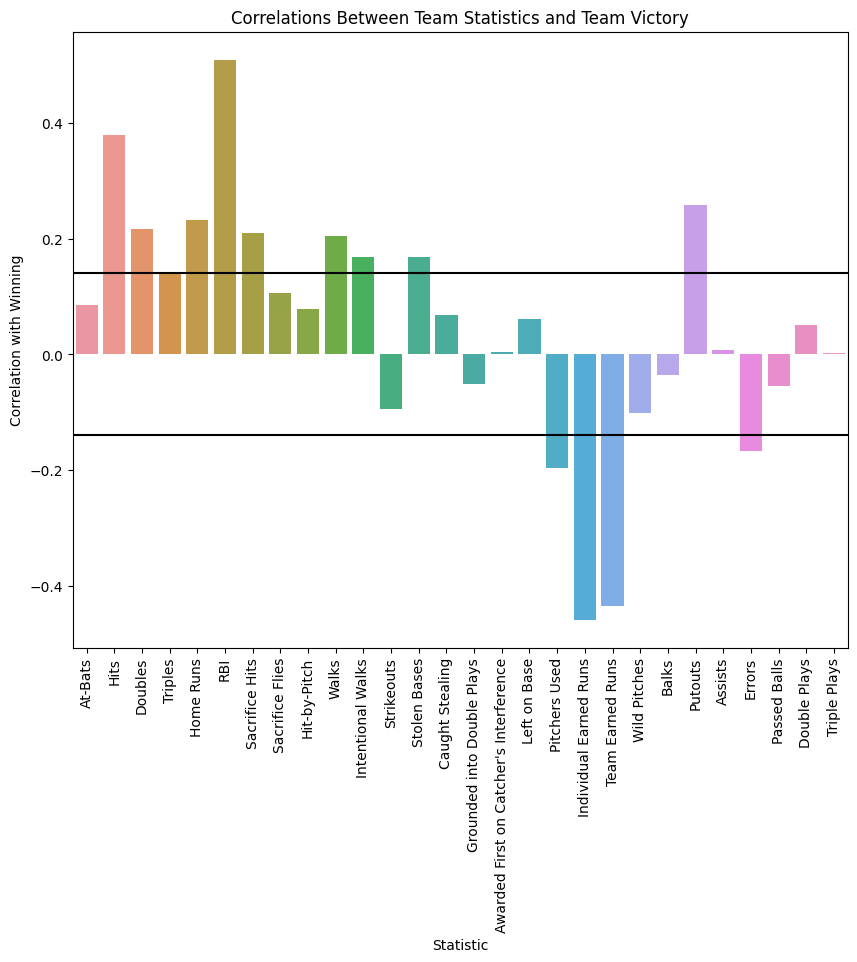

In [ ]:
# create a correlation barplot for regular season data
corr_cumulative = df_final[cumulative_cols].corr()[['Result']].drop('Result')

# Create visualization and change plot settings
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.barplot(x=corr_cumulative.index, y=corr_cumulative['Result'])
ax.axhline(0.14, color='black')
ax.axhline(-0.14, color='black')
plt.xticks(rotation='vertical')
ax.set_xlabel('Statistic')
ax.set_ylabel('Correlation with Winning')
ax.set_title('Correlations Between Team Statistics and Team Victory')
plt.show()

## **Modeling**

### **Logistic Regression**

Now that we know which features tend to be important for a team to win a game, we can begin to develop models to predict a team's likelihood of victory.

Since we want to predict the win rate of a teaam in a certain game, we first use a logistic regression as our model. The logistic regression is a simple model that returns a prediction between 0 and 1, which we can interpret to be the likelihood that a team won a given game. This is perfect for our use case.

The equation of the logistic model is: 
$$ ln(P/(1-P)) = \beta_0 + \beta_1X_1 + ... + \beta_nX_n $$
, where P is the win rate, P/(1-P) is the odd ratio for winning, and n is the number of features we used.


Instead of using all the features we have, we decided to split the features to three type of statistics: **batting, pitching, and defensive**. This helps us find the significant variables in each category.

Once we split the features, we trained four models: one with only batting statistics, one with only pitching statistics, one with only fielding statistics, and one with all three sets of statistics.

In [ ]:
# create the train/test split for regression
df_features_and_targets = df_final[['Hits', 'Doubles', 'Triples', 'Home Runs', 'RBI', 'Sacrifice Hits', 'Walks', 'Intentional Walks', 'Stolen Bases', 'Pitchers Used', 'Individual Earned Runs', 'Team Earned Runs', 'Putouts', 'Errors', 'Result']].dropna()

# Individual game component metrics
batting_features = df_features_and_targets[['Hits', 'Doubles', 'Triples', 'Home Runs', 'RBI', 'Sacrifice Hits', 'Walks', 'Intentional Walks', 'Stolen Bases']]
pitching_features = df_features_and_targets[['Pitchers Used', 'Individual Earned Runs', 'Team Earned Runs']]
defensive_features = df_features_and_targets[['Putouts', 'Errors']]

# Create target 
cumulative_features = df_features_and_targets.drop(['Result'], axis=1)
target = df_features_and_targets['Result']

# Create training and test sets for all four groups of features
X_train_cumulative, X_test_cumulative, y_train_cumulative, y_test_cumulative = train_test_split(cumulative_features, target, train_size=0.8, test_size=0.2)
X_train_batting, X_test_batting, y_train_batting, y_test_batting = train_test_split(batting_features, target, train_size=0.8, test_size=0.2)
X_train_pitching, X_test_pitching, y_train_pitching, y_test_pitching = train_test_split(pitching_features, target, train_size=0.8, test_size=0.2)
X_train_defensive, X_test_defensive, y_train_defensive, y_test_defensive = train_test_split(defensive_features, target, train_size=0.8, test_size=0.2)

In [ ]:
# Logistic Regression: All Metrics
cumulative_logreg = LogisticRegression(max_iter=200000)
cumulative_logreg.fit(X_train_cumulative, y_train_cumulative)

y_pred = cumulative_logreg.predict(X_test_cumulative)

log_acc_cumulative = sklearn.metrics.accuracy_score(y_pred, y_test_cumulative)

In [ ]:
# Logistic Regression: Batting Metrics (Offensive)
batting_logreg = LogisticRegression(max_iter=200000)
batting_logreg.fit(X_train_batting, y_train_batting)

y_pred = batting_logreg.predict(X_test_batting)

log_acc_batting = sklearn.metrics.accuracy_score(y_pred, y_test_batting)

In [ ]:
# Logistic Regression: Pitching Metrics
pitching_logreg = LogisticRegression(max_iter=200000)
pitching_logreg.fit(X_train_pitching, y_train_pitching)

y_pred = pitching_logreg.predict(X_test_pitching)

log_acc_pitching = sklearn.metrics.accuracy_score(y_pred, y_test_pitching)

In [ ]:
# Logistic Regression: Defensive Metrics 
defensive_logreg = LogisticRegression(max_iter=200000)
defensive_logreg.fit(X_train_defensive, y_train_defensive)

y_pred = defensive_logreg.predict(X_test_defensive)

log_acc_def = sklearn.metrics.accuracy_score(y_pred, y_test_defensive)

The following visualization shows the accuracy of each of the four models.

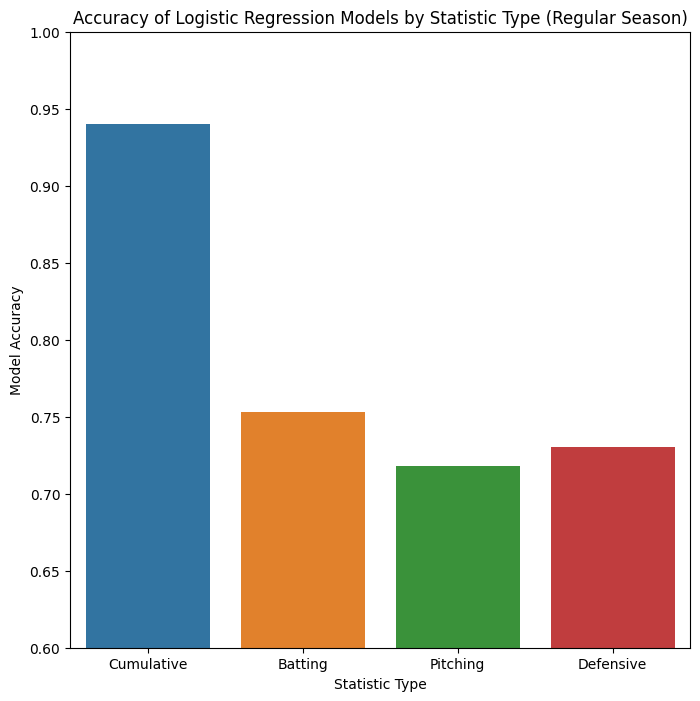

In [ ]:
# Plotting the accuracy of each model 
fig, ax = plt.subplots(figsize=(8,8))
ax = sns.barplot(x=['Cumulative', 'Batting', 'Pitching', 'Defensive'], y=[log_acc_cumulative, log_acc_batting, log_acc_pitching, log_acc_def])
ax.set_xlabel('Statistic Type')
ax.set_ylabel('Model Accuracy')
plt.ylim(0.6, 1)
ax.set_title('Accuracy of Logistic Regression Models by Statistic Type (Regular Season)')
plt.show()

The following visualization shows the magnitude of each feature's coefficient in the cumulative model:

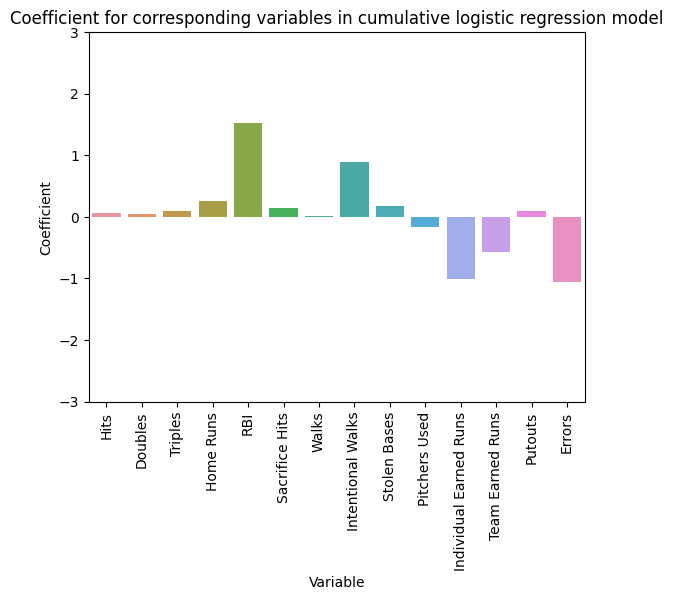

In [ ]:
# plotting coefficient of the logistic regression
model_coef = cumulative_logreg.coef_
feature_name = cumulative_logreg.feature_names_in_

sns.barplot(x = feature_name, y = model_coef[0])
plt.xticks(rotation=90)
plt.title("Coefficient for corresponding variables in cumulative logistic regression model")
plt.ylabel("Coefficient")
plt.xlabel("Variable")
plt.ylim(-3,3)
plt.show()

According to the plot, RBI (Runs Batted In) contributes a lot to the odds of winning. 

Every 1 unit increase in RBI will increase the odds of winning by $e^{1.5}-1 = $348%.

The following visualization shows the magnitude of each feature's coefficient in the batting statistics model:

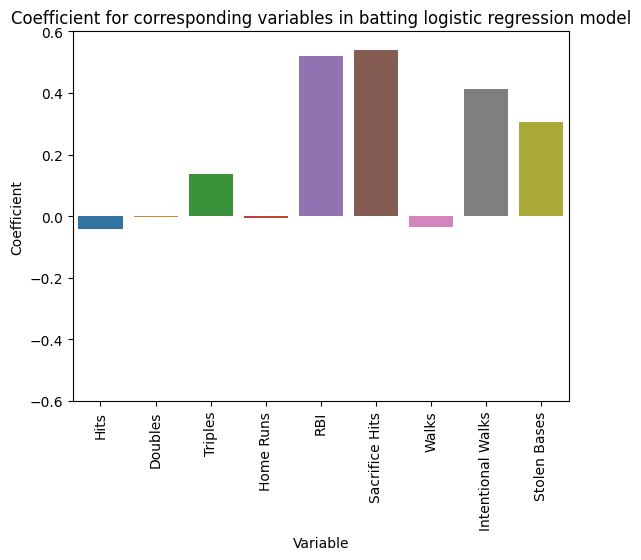

In [ ]:
# plotting coefficient of the logistic regression
model_coef = batting_logreg.coef_
feature_name = batting_logreg.feature_names_in_

sns.barplot(x = feature_name, y = model_coef[0])
plt.xticks(rotation=90)
plt.title("Coefficient for corresponding variables in batting logistic regression model")
plt.ylabel("Coefficient")
plt.xlabel("Variable")
plt.ylim(-0.6,0.6)
plt.show()

By using only the batting statistics, we find out Sacrifice Hits has the highest coefficient in the model which is round 0.53. This means every one unit increase in Sacrifice Hits will increase $e^{0.53}-1 = 69$% increase in odds of winning. 

However, when comparing to the cumulative logistic regression model, we observe a significant increase in Sacrifice Hits, which means there might have been colinearity in the cumulative model. This indicates a PCA might be helpful in modeling.

The following barplot shows the magnitude of each feature's coefficient in the pitching statistics model:

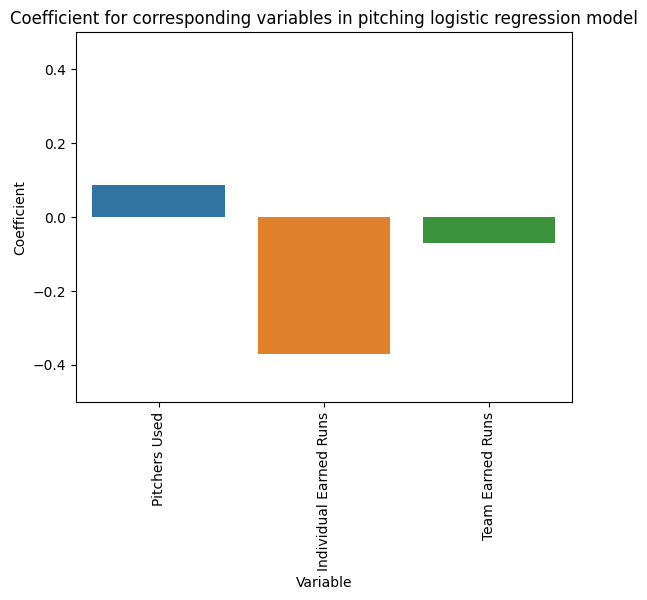

In [ ]:
# plotting coefficient of the logistic regression
model_coef = pitching_logreg.coef_
feature_name = pitching_logreg.feature_names_in_

sns.barplot(x = feature_name, y = model_coef[0])
plt.xticks(rotation=90)
plt.title("Coefficient for corresponding variables in pitching logistic regression model")
plt.ylabel("Coefficient")
plt.xlabel("Variable")
plt.ylim(-0.5,0.5)
plt.show()

The following visualization shows the magnitude of each feature's coefficient in the defensive statistics model:

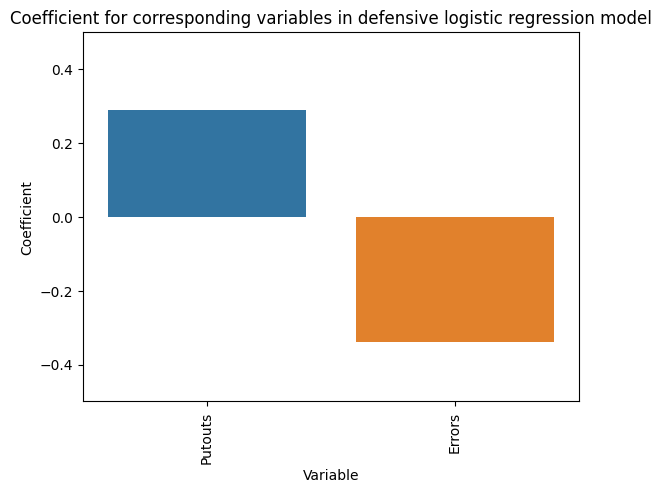

In [ ]:
# plotting coefficient of the logistic regression
model_coef = defensive_logreg.coef_
feature_name = defensive_logreg.feature_names_in_

sns.barplot(x = feature_name, y = model_coef[0])
plt.xticks(rotation=90)
plt.title("Coefficient for corresponding variables in defensive logistic regression model")
plt.ylabel("Coefficient")
plt.xlabel("Variable")
plt.ylim(-0.5,0.5)
plt.show()

  We see that the number of variables in pitching and defensive logistic regression models are small, which might indicate an **underfitting**, which could be the cause of the improved performance of the cumulative model.

PCA

To account for the possible colinearity in our cumulative model, we perform a principal component analysis, in hopes of improving the accuracy of our model.

In [ ]:
# compile the feature list
X = df_features_and_targets.drop(['Result'], axis=1)
target = df_features_and_targets['Result']

# scale the data
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

This visualization shows the explained variance ratio vs the number of components included in the model. The orange line shows the 0.95 explained variance ratio cutoff, and the red line shows the lowest number of components that meet that threshold (11).

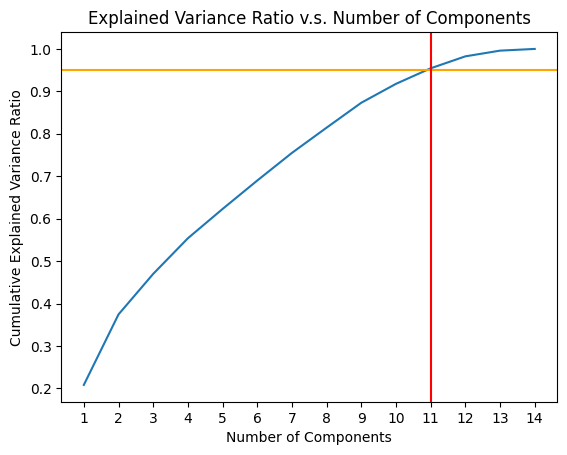

In [ ]:
# Find ideal number of principal components
pca = PCA(n_components=X_scaled.shape[1])
pca.fit(X_scaled)
cum_evr = np.cumsum(pca.explained_variance_ratio_)
ax = sns.lineplot(x=range(1, len(cum_evr) + 1), y=cum_evr)
ax.set_xlabel('Number of Components')
ax.set_ylabel('Cumulative Explained Variance Ratio')
ax.set_xticks(range(1, len(cum_evr) + 1))
ax.set_title('Explained Variance Ratio v.s. Number of Components')
ax.axhline(0.95, color='orange')
ax.axvline(11, color='red')
plt.show()

In [ ]:
pca = PCA(n_components=11)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

### Logistic Regression after PCA

Now that we've conducted a principal component analysis, we can rerun our logistic regression with the new number of components and compare the results.

In [ ]:
# Create training and test sets for all four groups of features
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, target, train_size=0.8, test_size=0.2)

In [ ]:
# Logistic Regression: All Metrics
logreg_pca = LogisticRegression()
logreg_pca.fit(X_train_pca, y_train_pca)

y_pred = logreg_pca.predict(X_test_pca)

log_acc_pca = sklearn.metrics.accuracy_score(y_pred, y_test_pca)
print(f"Accuracy: {log_acc_pca:.4f}")
sklearn.metrics.confusion_matrix(y_pred, y_test_pca)

Accuracy: 0.8972


array([[36859,  4056],
       [ 4378, 36755]])

After removing the colinearity, we get a lower accuracy, higher recall, and higher precision. It may indicate only a weak colinearity removed from the data.

### **Clustering**

To get an idea of which statistics tend to characterize successful, mediocre, and bad teams, we can perform a clustering analysis. Using the K Means algorithm, we can hopefully see some type of separation of teams into different groups based on the various features we outlined in our data.

First, to get an idea of how many clusters we should make, we can make an elbow plot, as seen in the visualization below:

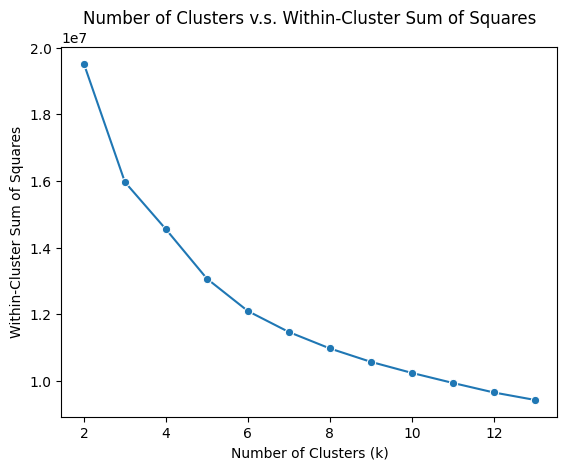

In [ ]:
# compile the feature list and include the target for the clustering
scaler = StandardScaler()
scaler.fit(df_features_and_targets)
X_scaled = scaler.transform(df_features_and_targets)

# Find ideal number of clusters
distortions = []
for i in range(2, 14):
  km = KMeans(n_clusters=i, n_init=5, random_state=0)
  km.fit(X)
  distortions.append(km.inertia_)
ax = sns.lineplot(x=range(2,14), y=distortions, marker="o")
ax.set_xlabel('Number of Clusters (k)')
ax.set_ylabel('Within-Cluster Sum of Squares')
ax.set_title('Number of Clusters v.s. Within-Cluster Sum of Squares')
plt.show()

We can say that the elbow in the plot happens around 3 components and use this value for our analysis. The following visualization shows the three clusters that are produced when running the K Means algorithm:

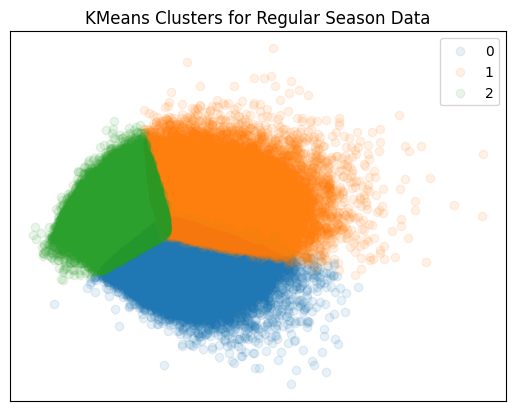

In [ ]:
# run the kmeans algorithm for the pca data
kmeans = KMeans(n_init=10, n_clusters=3, max_iter=200000)
label = kmeans.fit_predict(X_pca)
u_labels = np.unique(label)
plt.title('KMeans Clusters for Regular Season Data')
plt.xticks([])
plt.yticks([])
for i in u_labels:
    plt.scatter(X_pca[label == i , 0] , X_pca[label == i , 1] , label = i, alpha = 0.1)
plt.legend()
plt.show()

The following visualization shows the number of teams that belong to each cluster:

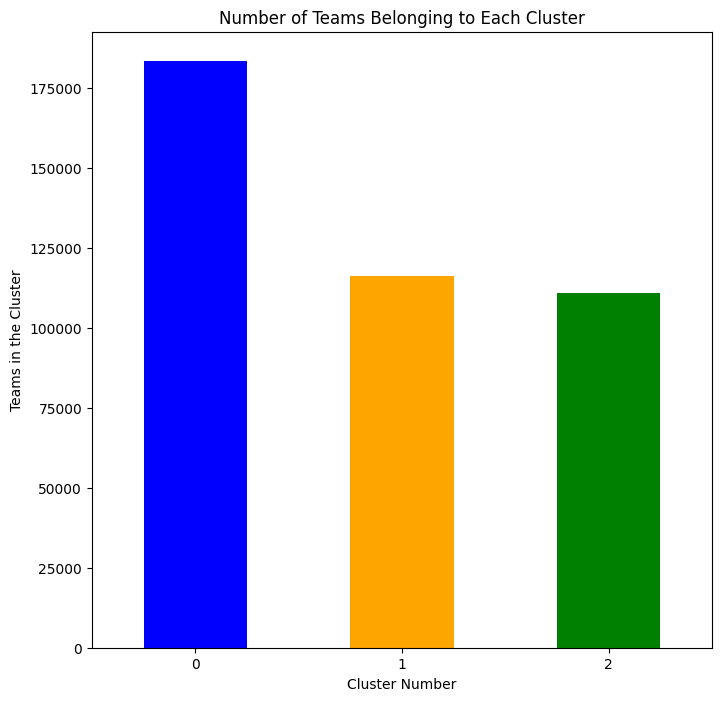

In [ ]:
# find the number of points in each cluster
cluster_counts = pd.DataFrame(kmeans.labels_)

fig, ax = plt.subplots(figsize=(8,8))
cluster_counts.value_counts().plot(kind='bar', color=['blue', 'orange', 'green'])
ax.set_xlabel('Cluster Number')
ax.set_ylabel('Teams in the Cluster')
ax.set_xticklabels([str(i) for i in range(0,3)], rotation='horizontal')
ax.set_title('Number of Teams Belonging to Each Cluster')
plt.show()

The following visualization shows the comparative centroid values for each feature of each cluster:

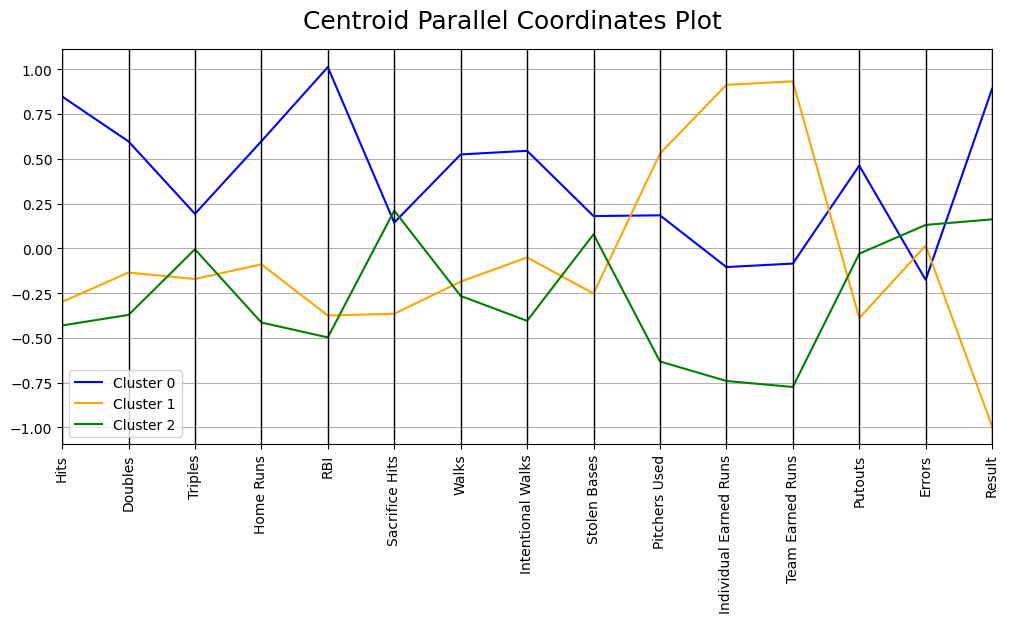

In [ ]:
# plot the clusters for team data along with their centroids
from pandas.plotting import parallel_coordinates

kmeans = KMeans(n_init=10, init='random', n_clusters=3)
kmeans.fit(X_scaled)
clusters =  kmeans.predict(X_scaled)

centroids = pd.DataFrame(kmeans.cluster_centers_, columns=df_features_and_targets.columns)
centroids['cluster'] = centroids.index

# Create the plot
figure = plt.figure(figsize=(12, 5))
title = figure.suptitle("Centroid Parallel Coordinates Plot", fontsize=18)
figure.subplots_adjust(top=0.9, wspace=0)

parallel_coordinates(centroids, 'cluster', color=['blue', 'orange', 'green'])

ax=plt.gca()
plt.xticks(rotation='vertical')
plt.legend(['Cluster '+str(i) for i in range(3)])
plt.show()

We see that the baseball teams that tend to be the most successful have a good mix of good batting statistics and good pitching statistics.

Teams that perform the worst tend to have really poor pitching.

Teams that are somewhere in the middle tend to have a mix of poor hitting and good pitching.

### XGBoosting

While the Logistic regression is giving us a satisfactory accuracy, we want to try more advance model that might have a high accuracy, lower recall, and lower precision. After reading https://www.baseballdatascience.com/world-series-predictions/, we tried to use an XGBoosting model.

In [ ]:
# XGB Classifier 
cumulative_xgb = xgb.XGBClassifier(objective="binary:logistic")

cumulative_xgb.fit(X_train_cumulative, y_train_cumulative)

y_pred = cumulative_xgb.predict(X_test_cumulative)

xgb_acc_cumulative = sklearn.metrics.accuracy_score(y_pred, y_test_cumulative)
print(f"XGBoost model accuracy: {xgb_acc_cumulative:.4f}")
print("Confusion matrix:")
sklearn.metrics.confusion_matrix(y_pred, y_test_cumulative)

XGBoost model accuracy: 0.9697
Confusion matrix:


array([[39561,  1094],
       [ 1388, 40005]])

The accuracy for the XGBoosting model met our expectation; getting an accuracy higher than 0.95. However, by having the high accuracy, we lose the ability to explan the relation between win rate and features.

In the next section, the XGB model performed worse than the Logistic regression model, which might indicate an overfiiting. As a result, we will keep using the logistic regression as prediction method.

## **Regular Season Power Rankings**

Now that we have defined a model for predicting team success in the regular season and have validated it using a testing set, we thought it would be interesting to create a "power ranking" list for the 2022 season based only on team averages for several statistical metrics throughout the year. This would allow us to make a "postseason roster" based on the postseason seeding rules before proceeding to our analysis of postseason data.

Though we had originally hoped to perform this analysis on 2023 teams, we decided instead to use 2022 data for a number of reasons. First, we thought it would be interesting to compare our model's power ranking predictions with the actual postseason lineup from 2022. More importantly, however, the Retrosheet website does not yet contain game-by-game data for the 2023 season.

In [ ]:
# Extract game-by-game data for each team for the 2022 season
df_2022 = pd.read_csv('gl2022.txt')
df_2022.columns = all_columns
df_2022['Date'] =  pd.to_datetime(df_2022['Date'], format='%Y%m%d')
df_2022_PR = df_2022.copy()

# Remove any ties and sort into home and visiting rows
df_2022_PR = df_2022_PR[df_2022_PR['Home Score'] != df_2022_PR['Visiting Score']]
df_2022_PR['Home Result'] = df_2022_PR.apply(lambda x: 1 if x['Visiting Score'] < x['Home Score'] else 0, axis=1)
df_2022_PR['Visiting Result'] = df_2022_PR.apply(lambda x: 1 if x['Visiting Score'] > x['Home Score'] else 0, axis=1)

# Each row is now a single team and their single game performance
df_visiting_2022 = df_2022_PR[visiting_features]
df_visiting_2022.columns = columns
df_home_2022 = df_2022_PR[home_features]
df_home_2022.columns = columns
df_2022_PR = pd.concat([df_home_2022, df_visiting_2022])

# Features determined via previous correlation matrix. Include team name but remove result value
df_2022_PR = df_2022_PR[['Team', 'Hits', 'Doubles', 'Triples', 'Home Runs', 'RBI', 'Sacrifice Hits', 'Walks', 'Intentional Walks', 'Stolen Bases', 'Pitchers Used', 'Individual Earned Runs', 'Team Earned Runs', 'Putouts', 'Errors']].dropna()

For user readability, we have changed the three letter acronyms to their more well-known team names as per the teams.txt file. For instance, all instances of "PHI" will now be identified as "Philadelphia Phillies." This file can be found at https://www.retrosheet.org/TEAMABR.TXT.

In [ ]:
# Create dataframe for abbreviation to team name conversion
teams = pd.read_csv('teams.txt')
teams.columns = ['Team', 'League', 'City', 'Team Name', 'From', 'To']
teams['Full Name'] = teams['City'] + ' ' + teams['Team Name']
teams = teams[teams['To'] == 2021]
teams = teams[['Team', 'Full Name']]

In [ ]:
# Create dataframe that has 30 rows, one for each team, with their metrics 
# Determine averages for each of the feature columns for each team
df_2022_PRg = df_2022_PR.groupby(['Team']).mean().reset_index()

# Merge along team name
df_2022_PRg_merged = teams.merge(df_2022_PRg, how='outer')
df_2022_PR_final = df_2022_PRg_merged.drop(columns=['Team'])
df_2022_PR_final = df_2022_PR_final.rename(columns={'Full Name': 'Team'})

In [ ]:
testing_DF = df_2022_PR_final.drop(columns=['Team'])

In [ ]:
# Pass through predictive model (regular season) to determine power ranking metrics
# team_pred = cumulative_xgb.predict_proba(testing_DF)
team_pred = cumulative_logreg.predict_proba(testing_DF)

# Only take the column which tells overall likelihood to "win" (1) a given game
team_pred_subset = team_pred[:, 1]

The following dataframe is the final power rankings as determined by the model:

In [ ]:
# Convert team_pred into a dataframe
PR_dataframe = pd.DataFrame(team_pred_subset, columns=['Power Ranking Metric'])

# Merge with initial dataframe
df_2022_PR_final['Power Ranking Metric'] = PR_dataframe['Power Ranking Metric']
PR_final = df_2022_PR_final[['Team', 'Power Ranking Metric']]
PR_final = PR_final.sort_values(by='Power Ranking Metric', ascending=False)
PR_final

,Team,Power Ranking Metric
20,Los Angeles Dodgers,0.952188
6,Houston Astros,0.880697
9,New York Yankees,0.873011
16,Atlanta Braves,0.808631
24,New York Mets,0.761546
28,St. Louis Cardinals,0.704982
14,Toronto Blue Jays,0.661225
4,Cleveland Indians,0.607887
25,Philadelphia Phillies,0.595969
11,Seattle Mariners,0.574962


After passing team data from the 2022 season into our model, we obtain the power ranking metrics provided above. Taking into account which division each team plays for and referring to the official FAQ for playoff seeding (https://www.mlb.com/news/mlb-playoff-format-faq), we created the following postseason seeding.

**Power Ranking Expected Seeding:**

NL:


1.   Los Angeles Dodgers
2.   Atlanta Braves
3.   St. Louis Cardinals
4.   New York Mets
5.   Philadelphia Phillies
6.   Milwaukee Brewers 


AL:


1.   Houston Astros
2.   New York Yankees
3.   Cleveland Guardians
4.   Toronto Blue Jays
5.   Seattle Mariners
6.   Tampa Bay Rays

Compare this now to the actual 2022 postseason picture.

**Actual 2022 Postseason Seeding:**

NL:


1.   Los Angeles Dodgers
2.   Atlanta Braves
3.   St. Louis Cardinals
4.   New York Mets
5.   San Diego Padres
6.   Philadelphia Phillies


AL:


1.   Houston Astros
2.   New York Yankees
3.   Cleveland Guardians
4.   Toronto Blue Jays
5.   Seattle Mariners
6.   Tampa Bay Rays

The only changes come with the wild card teams in the National League. Note that the San Diego Padres, Philadelphia Phillies, and Milwaukee Brewers finished the 2022 season with nearly identical records, with the final two playoff spots being awarded to San Diego (89 wins) and Philadelphia (87 wins) while Milwaukee missed out (86 wins). However, over the span of an entire season (162 games), these results are rather impressive from our model.

# **Postseason Analysis**

We will now continue our analysis by evaluating a subset of teams (selected from our regular season power ranking predictions) under a new playoff model. This model notably takes in home field advantage, which is a prominent factor in the postseason, and is created from postseason data as opposed to regular season data.

## **Data Loading**

As before, we need to upload and read the data that we will be using for our postseason analysis. Our datset this time is composed of only 4 .txt files, which include historical data from the wild card, divisional series, league championship series, and world series games throughout MLB history. These four rounds constitute the entire of MLB postseason play. We again combine these four datasets into one cumulative postseason Dataframe.

In [ ]:
# Read postseason data

# Wild-Card
df_WC = pd.read_csv('glwc.txt')
df_WC.columns = all_columns
df_WC['Date'] = pd.to_datetime(df_WC['Date'], format='%Y%m%d')

# Divsion Series
df_div = pd.read_csv('gldv.txt')
df_div.columns = all_columns
df_div['Date'] = pd.to_datetime(df_div['Date'], format='%Y%m%d')

# League Championship Series
df_lcs = pd.read_csv('gllc.txt')
df_lcs.columns = all_columns
df_lcs['Date'] = pd.to_datetime(df_lcs['Date'], format='%Y%m%d')

# World Series
df_WS = pd.read_csv('glws.txt')
df_WS.columns = all_columns
df_WS['Date'] = pd.to_datetime(df_WS['Date'], format='%Y%m%d')

In [ ]:
df_postseason = pd.concat([df_WC, df_div, df_lcs, df_WS])

## **Data Preprocessing**

We will perform our data preprocessing in the same manner as we did with the regular season data.

Now that we have loaded the postseason matchup data, we want to clean and process it so that it is in an useful state for feature extraction and modeling. As before, we have game-by-game matchup data for each game in our dataset, which is now consistent with historical MLB postseason game data. We again want to remove "home" or "away" metrics and simply look at important offensive, defensive, and pitching metrics on a game-by-game basis, per team. Thus, each row of this new cumulative dataframe will include a single team's performance in a single game, effectively doubling the size of the resultant dataframe.

Additionally, we will create a new column to record the outcome of the game for each row. This binary value will be a 1 if the team won the game or a 0 if the team lost the game. 

We used the same rationale as before regarding games ending in ties or games which ended prior to the 9th inning, although instances of these circumstances were exceptionally rare in the playoff data.

In [ ]:
# Remove ties
df_postseason = df_postseason[df_postseason['Home Score'] != df_postseason['Visiting Score']]

In [ ]:
# Create "Home Result" and "Visiting Result" columns
df_postseason['Home Result'] = df_postseason.apply(lambda x: 1 if x['Visiting Score'] < x['Home Score'] else 0, axis=1)
df_postseason['Visiting Result'] = df_postseason.apply(lambda x: 1 if x['Visiting Score'] > x['Home Score'] else 0, axis=1)

In [ ]:
# Create cumulative array
df_postseason_visiting = df_postseason[visiting_features]
df_postseason_visiting.columns = columns

df_postseason_home = df_postseason[home_features]
df_postseason_home.columns = columns

df_postseason_final = pd.concat([df_postseason_home, df_postseason_visiting])

## **EDA**

Prior to creating models which we can use to analyze game-by-game postseason data and predict the likelihood of a team's success (measured by wins), we need to determine which metrics or features should be included in our models.

Unlike before, we will perform two sections of EDA. The first of these will used the combined postseason dataset collected above, which does not delineate between home and away games. This will mainly be for comparison purposes as we aim to determine if many of the same features from our original logistic regression model are again significant. 

The correlation barplot for this initial data analysis is included below. We did not implement a feature cutoff boundary for this data analysis as we will be using the same features for this first model as we used in our regular season model.

The visualization below shows the correlation between team statistics and victory for the post season data:

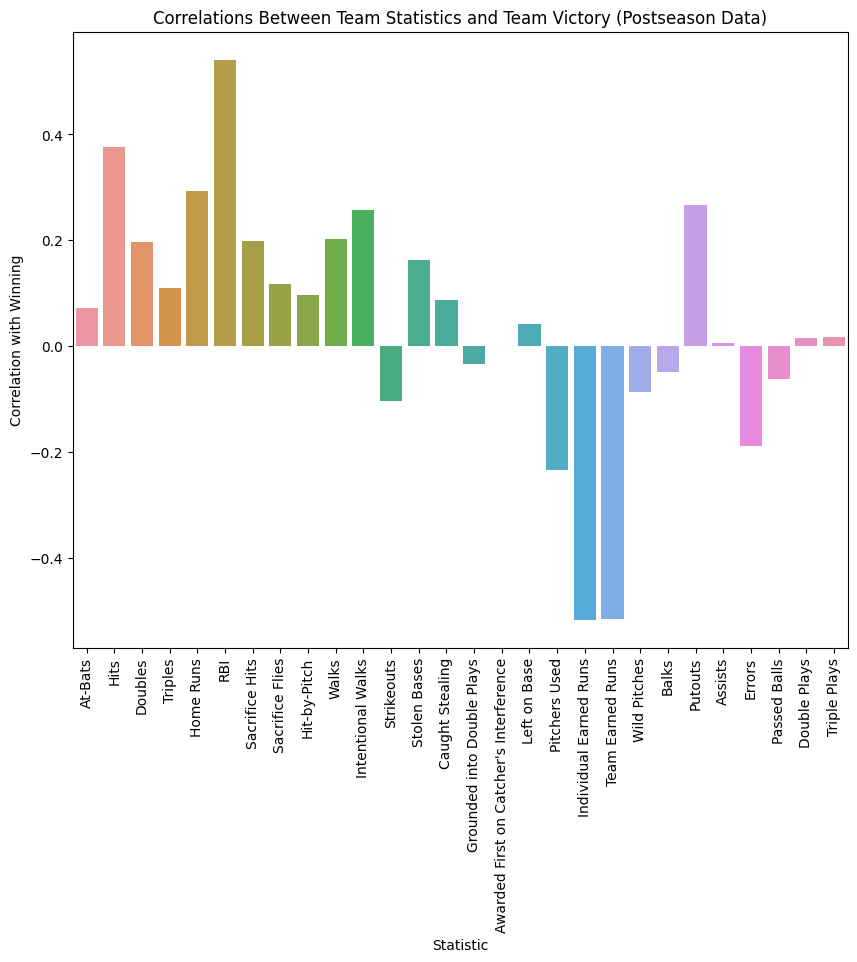

In [ ]:
# Determine metric correlations
corr_postseason = df_postseason_final[cumulative_cols].corr()[['Result']].drop('Result')

# Plotting
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.barplot(x=corr_postseason.index, y=corr_postseason['Result'])
plt.xticks(rotation='vertical')
ax.set_xlabel('Statistic')
ax.set_ylabel('Correlation with Winning')
ax.set_title('Correlations Between Team Statistics and Team Victory (Postseason Data)')
plt.show()

However, we will be adding another layer of complexity to our postseason model by factoring in "home" vs. "visiting" metrics for a given team. This decision was made because of the notable impact that home-field advantage has in the playoffs. 

We now obtain a much larger correlation barplot that informs us about the influence of home team metrics and visiting team metrics in the playoffs. We will again use a cutoff value of 0.14 such that any positive correlations less than 0.14 or any negative correlations greater than -0.14 will not be considered. These cutoff lines are again included in the correlation barplot below. 

This will allow us to determine which features should be considered in our final postseason matchup-based model.

In [ ]:
# Add "Home Won" qualfiying factor
df_postseason_matchups = df_postseason
df_postseason_matchups['Home Won'] = df_postseason_matchups.apply(lambda x: 1 if x['Visiting Score'] < x['Home Score'] else 0, axis=1)

The visualization below shows the correlation between home and away team statistics and whether or not the home team won:

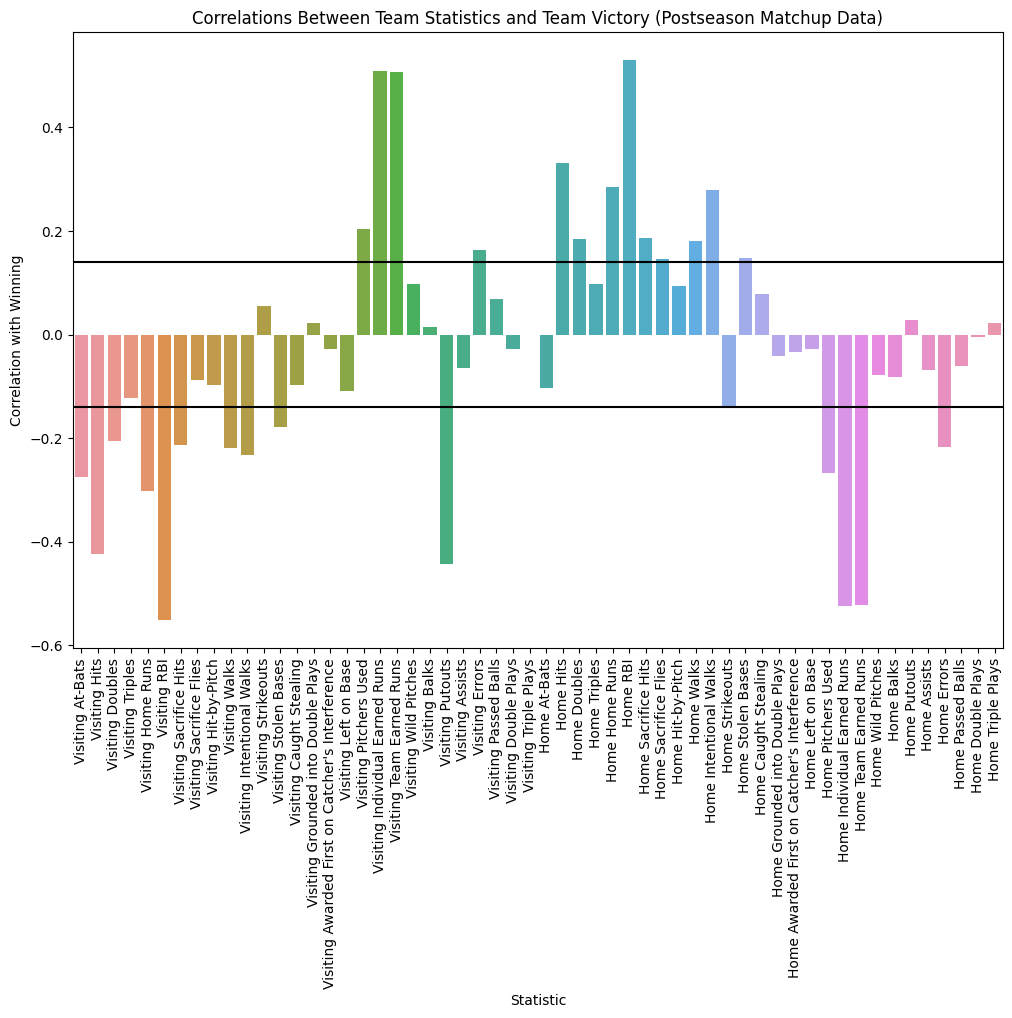

In [ ]:
cumulative_cols_matchups = ["Visiting At-Bats", "Visiting Hits", "Visiting Doubles", "Visiting Triples", "Visiting Home Runs", "Visiting RBI", "Visiting Sacrifice Hits", 
                 "Visiting Sacrifice Flies", "Visiting Hit-by-Pitch", "Visiting Walks", "Visiting Intentional Walks", "Visiting Strikeouts", 
                 "Visiting Stolen Bases", "Visiting Caught Stealing", "Visiting Grounded into Double Plays", "Visiting Awarded First on Catcher's Interference", 
                 "Visiting Left on Base", 'Visiting Pitchers Used', 'Visiting Individual Earned Runs', 'Visiting Team Earned Runs', 'Visiting Wild Pitches', 'Visiting Balks', 'Visiting Putouts', 
                 'Visiting Assists', 'Visiting Errors', 'Visiting Passed Balls', 'Visiting Double Plays', 'Visiting Triple Plays', "Home Won",
                 "Home At-Bats", "Home Hits", "Home Doubles", "Home Triples", "Home Home Runs", "Home RBI", "Home Sacrifice Hits", 
                 "Home Sacrifice Flies", "Home Hit-by-Pitch", "Home Walks", "Home Intentional Walks", "Home Strikeouts", 
                 "Home Stolen Bases", "Home Caught Stealing", "Home Grounded into Double Plays", "Home Awarded First on Catcher's Interference", 
                 "Home Left on Base", 'Home Pitchers Used', 'Home Individual Earned Runs', 'Home Team Earned Runs', 'Home Wild Pitches', 'Home Balks', 'Home Putouts', 
                 'Home Assists', 'Home Errors', 'Home Passed Balls', 'Home Double Plays', 'Home Triple Plays']

# Correlation barplot with "home" and "visiting" metrics
corr_postseason_matchups = df_postseason_matchups[cumulative_cols_matchups].corr()[['Home Won']].drop('Home Won')

# Plotting 
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.barplot(x=corr_postseason_matchups.index, y=corr_postseason_matchups['Home Won'])
plt.xticks(rotation='vertical')
ax.set_xlabel('Statistic')
ax.set_ylabel('Correlation with Winning')
ax.set_title('Correlations Between Team Statistics and Team Victory (Postseason Matchup Data)')
ax.axhline(0.14, color='black')
ax.axhline(-0.14, color='black')
plt.show()

## **Modeling**

### **Logistic Regression (Model 1)**

First, for the sake of simplicity, we can create a model analogous to our model from the regular season analysis, that will now tell us the likelihood that a team in the postseason wins an arbitrary postseason game.

As we did with the Regular Season Analysis, we will use a logistic regression model to predict the likelihood of a team winning a postseason game. We will discard the XGBoosting since it showed evidence of overfitting.

First, we will try to predict the win rate base on the statistic of **one** team in a certain game.

In [ ]:
# create the train/test split for regression
df_postseason_features_and_targets = df_postseason_final[['Hits', 'Doubles', 'Triples', 'Home Runs', 'RBI', 'Sacrifice Hits', 'Walks', 'Intentional Walks', 'Stolen Bases', 'Pitchers Used', 'Individual Earned Runs', 'Team Earned Runs', 'Putouts', 'Errors', 'Result']].dropna()

batting_features_postseason = df_postseason_features_and_targets[['Hits', 'Doubles', 'Triples', 'Home Runs', 'RBI', 'Sacrifice Hits', 'Walks', 'Intentional Walks', 'Stolen Bases']]
pitching_features_postseason = df_postseason_features_and_targets[['Pitchers Used', 'Individual Earned Runs', 'Team Earned Runs']]
defensive_features_postseason = df_postseason_features_and_targets[['Putouts', 'Errors']]

cumulative_features_postseason = df_postseason_features_and_targets.drop(['Result'], axis=1)
target_postseason = df_postseason_features_and_targets['Result']

X_train_cumulative_post, X_test_cumulative_post, y_train_cumulative_post, y_test_cumulative_post = train_test_split(cumulative_features_postseason, target_postseason, train_size=0.8, test_size=0.2)
X_train_batting_post, X_test_batting_post, y_train_batting_post, y_test_batting_post = train_test_split(batting_features_postseason, target_postseason, train_size=0.8, test_size=0.2)
X_train_pitching_post, X_test_pitching_post, y_train_pitching_post, y_test_pitching_post = train_test_split(pitching_features_postseason, target_postseason, train_size=0.8, test_size=0.2)
X_train_defensive_post, X_test_defensive_post, y_train_defensive_post, y_test_defensive_post = train_test_split(defensive_features_postseason, target_postseason, train_size=0.8, test_size=0.2)

In [ ]:
# run the cumulative logistic regression
cumulative_postseason_logreg = LogisticRegression(max_iter=200000)
cumulative_postseason_logreg.fit(X_train_cumulative_post, y_train_cumulative_post)

y_pred_postseason_cumulative = cumulative_postseason_logreg.predict(X_test_cumulative_post)

log_acc_postseason_cumulative = sklearn.metrics.accuracy_score(y_pred_postseason_cumulative, y_test_cumulative_post)

In [ ]:
# run the batting statistics logistic regression
batting_postseason_logreg = LogisticRegression(max_iter=200000)
batting_postseason_logreg.fit(X_train_batting_post, y_train_batting_post)

y_pred_postseason_batting = batting_postseason_logreg.predict(X_test_batting_post)

log_acc_postseason_batting = sklearn.metrics.accuracy_score(y_pred_postseason_batting, y_test_batting_post)

In [ ]:
# run the pitching statistics logistic regression
pitching_postseason_logreg = LogisticRegression(max_iter=200000)
pitching_postseason_logreg.fit(X_train_pitching_post, y_train_pitching_post)

y_pred_postseason_pitching = pitching_postseason_logreg.predict(X_test_pitching_post)

log_acc_postseason_pitching = sklearn.metrics.accuracy_score(y_pred_postseason_pitching, y_test_pitching_post)

In [ ]:
# run the defensive statistics logistic regression
defensive_postseason_logreg = LogisticRegression(max_iter=200000)
defensive_postseason_logreg.fit(X_train_defensive_post, y_train_defensive_post)

y_pred_postseason_defensive = defensive_postseason_logreg.predict(X_test_defensive_post)

log_acc_postseason_defensive = sklearn.metrics.accuracy_score(y_pred_postseason_defensive, y_test_defensive_post)

The following visualization shows the accuracy of each of the four models above:

Text(0.5, 1.0, 'Accuracy of Logistic Regression Models by Statistic Type (Post Season)')

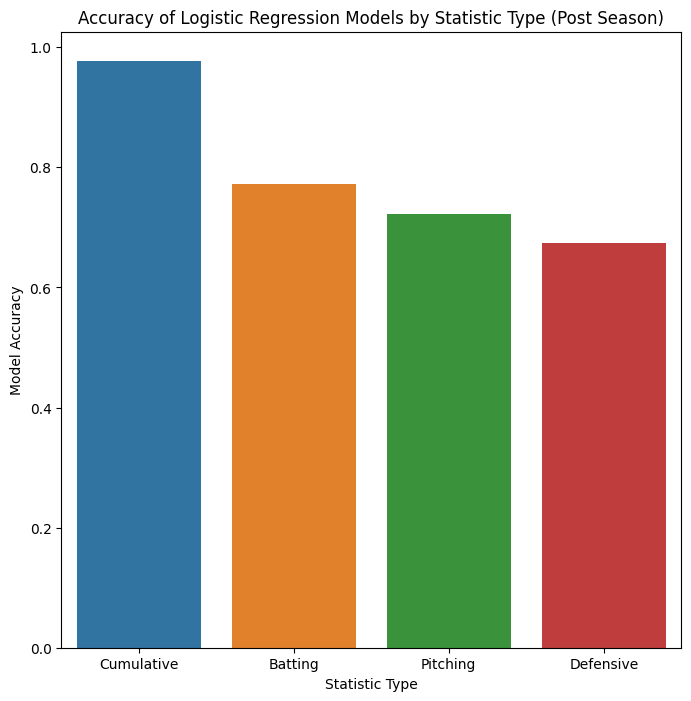

In [ ]:
# plot the accuracy of each model
fig, ax = plt.subplots(figsize=(8,8))
ax = sns.barplot(x=['Cumulative', 'Batting', 'Pitching', 'Defensive'], y=[log_acc_postseason_cumulative, log_acc_postseason_batting, log_acc_postseason_pitching, log_acc_postseason_defensive])
ax.set_xlabel('Statistic Type')
ax.set_ylabel('Model Accuracy')
ax.set_title('Accuracy of Logistic Regression Models by Statistic Type (Post Season)')

According to the plot, we find out the model using cumulative features has the best performance comparing to other three models. The potential reason for it might be the same as we analyzed in **Regular Season Analysis**; the number of parameters is too small for models to make a good prediction("underfitting").

### **Logistic Regression (Model 2)**
Building on the idea from our first model, we now want to build a model that will predict the likelihood that the home team will win a given match up between two teams, based on each teams statistics in the game. This model will serve as the basis for our analysis, where we predict the winner of each postseason game, all the way through the World Series.

As a result, we construct a new variable **Home Won** and combine both Visiting and Home team statistic as our features.

As we did in Regular Season Part, we still split the features into three parts, and explore any relation between home win rate and variables.

In [ ]:
# create the train/test split for regression
df_postseason_matchups_features_and_targets = df_postseason_matchups[["Visiting At-Bats", "Visiting Hits", "Visiting Doubles", "Visiting Home Runs", "Visiting RBI", "Visiting Sacrifice Hits", 
                 "Visiting Walks", "Visiting Intentional Walks", "Home Won",
                 "Visiting Stolen Bases", 'Visiting Pitchers Used', 'Visiting Individual Earned Runs', 'Visiting Team Earned Runs', 'Visiting Putouts', 
                 'Visiting Errors', "Home Hits", "Home Doubles", "Home Home Runs", "Home RBI", "Home Sacrifice Hits", 
                 "Home Sacrifice Flies", "Home Walks", "Home Intentional Walks", "Home Strikeouts", 
                 "Home Stolen Bases", 'Home Pitchers Used', 'Home Individual Earned Runs', 'Home Team Earned Runs', 'Home Errors']].dropna()

batting_features_postseason_matchups = df_postseason_matchups_features_and_targets[["Visiting At-Bats", "Visiting Hits", "Visiting Doubles", "Visiting Home Runs", "Visiting RBI", "Visiting Sacrifice Hits", 
                 "Visiting Walks", "Visiting Intentional Walks",
                 "Visiting Stolen Bases" , "Home Hits", "Home Doubles", "Home Home Runs", "Home RBI", "Home Sacrifice Hits", 
                 "Home Sacrifice Flies", "Home Walks", "Home Intentional Walks", "Home Strikeouts", "Home Stolen Bases"]]
pitching_features_postseason_matchups = df_postseason_matchups_features_and_targets[['Visiting Pitchers Used', 'Visiting Individual Earned Runs', 'Visiting Team Earned Runs',
                                                                   'Home Pitchers Used', 'Home Individual Earned Runs', 'Home Team Earned Runs']]
defensive_features_postseason_matchups = df_postseason_matchups_features_and_targets[['Visiting Putouts', 'Visiting Errors', 'Home Errors']]

cumulative_features_postseason_matchups = df_postseason_matchups_features_and_targets.drop(['Home Won'], axis=1)
target_postseason_matchups = df_postseason_matchups_features_and_targets['Home Won']

X_train_cumulative_post_matchups, X_test_cumulative_post_matchups, y_train_cumulative_post_matchups, y_test_cumulative_post_matchups = train_test_split(cumulative_features_postseason_matchups, target_postseason_matchups, train_size=0.8, test_size=0.2)
X_train_batting_post_matchups, X_test_batting_post_matchups, y_train_batting_post_matchups, y_test_batting_post_matchups = train_test_split(batting_features_postseason_matchups, target_postseason_matchups, train_size=0.8, test_size=0.2)
X_train_pitching_post_matchups, X_test_pitching_post_matchups, y_train_pitching_post_matchups, y_test_pitching_post_matchups = train_test_split(pitching_features_postseason_matchups, target_postseason_matchups, train_size=0.8, test_size=0.2)
X_train_defensive_post_matchups, X_test_defensive_post_matchups, y_train_defensive_post_matchups, y_test_defensive_post_matchups = train_test_split(defensive_features_postseason_matchups, target_postseason_matchups, train_size=0.8, test_size=0.2)

In [ ]:
# run the cumulative logistic regression for matchups
cumulative_postseason_logreg_matchups = LogisticRegression(max_iter=200000)
cumulative_postseason_logreg_matchups.fit(X_train_cumulative_post_matchups, y_train_cumulative_post_matchups)

y_pred_postseason_cumulative_matchups = cumulative_postseason_logreg_matchups.predict(X_test_cumulative_post_matchups)

log_acc_postseason_cumulative_matchups = sklearn.metrics.accuracy_score(y_pred_postseason_cumulative_matchups, y_test_cumulative_post_matchups)

In [ ]:
# run the batting statistics logistic regression for matchups
batting_postseason_logreg_matchups = LogisticRegression(max_iter=200000)
batting_postseason_logreg_matchups.fit(X_train_batting_post_matchups, y_train_batting_post_matchups)

y_pred_postseason_batting_matchups = batting_postseason_logreg_matchups.predict(X_test_batting_post_matchups)

log_acc_postseason_batting_matchups = sklearn.metrics.accuracy_score(y_pred_postseason_batting_matchups, y_test_batting_post_matchups)

In [ ]:
# run the pitching statistics logistic regression for matchups
pitching_postseason_logreg_matchups = LogisticRegression(max_iter=200000)
pitching_postseason_logreg_matchups.fit(X_train_pitching_post_matchups, y_train_pitching_post_matchups)

y_pred_postseason_pitching_matchups = pitching_postseason_logreg_matchups.predict(X_test_pitching_post_matchups)

log_acc_postseason_pitching_matchups = sklearn.metrics.accuracy_score(y_pred_postseason_pitching_matchups, y_test_pitching_post_matchups)

In [ ]:
# run the defensive statistics logistic regression for matchups
defensive_postseason_logreg_matchups = LogisticRegression(max_iter=200000)
defensive_postseason_logreg_matchups.fit(X_train_defensive_post_matchups, y_train_defensive_post_matchups)

y_pred_postseason_defensive_matchups = defensive_postseason_logreg_matchups.predict(X_test_defensive_post_matchups)

log_acc_postseason_defensive_matchups = sklearn.metrics.accuracy_score(y_pred_postseason_defensive_matchups, y_test_defensive_post_matchups)

The following visualization shows the accuracy of each of the four models above:

Text(0.5, 1.0, 'Accuracy of Logistic Regression Models by Statistic Type (Postseason Matchup Data)')

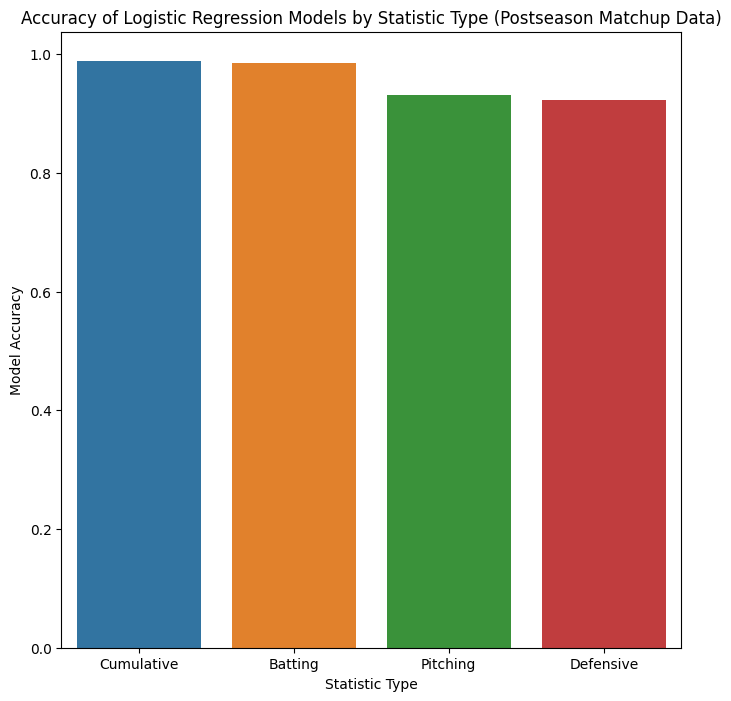

In [ ]:
# plot the accuracy of each of the four models
fig, ax = plt.subplots(figsize=(8,8))
ax = sns.barplot(x=['Cumulative', 'Batting', 'Pitching', 'Defensive'], y=[log_acc_postseason_cumulative_matchups, log_acc_postseason_batting_matchups, log_acc_postseason_pitching_matchups, log_acc_postseason_defensive_matchups])
ax.set_xlabel('Statistic Type')
ax.set_ylabel('Model Accuracy')
ax.set_title('Accuracy of Logistic Regression Models by Statistic Type (Postseason Matchup Data)')

The following visualization shows the magnitude of each feature's coefficient in the cumulative matchups model:

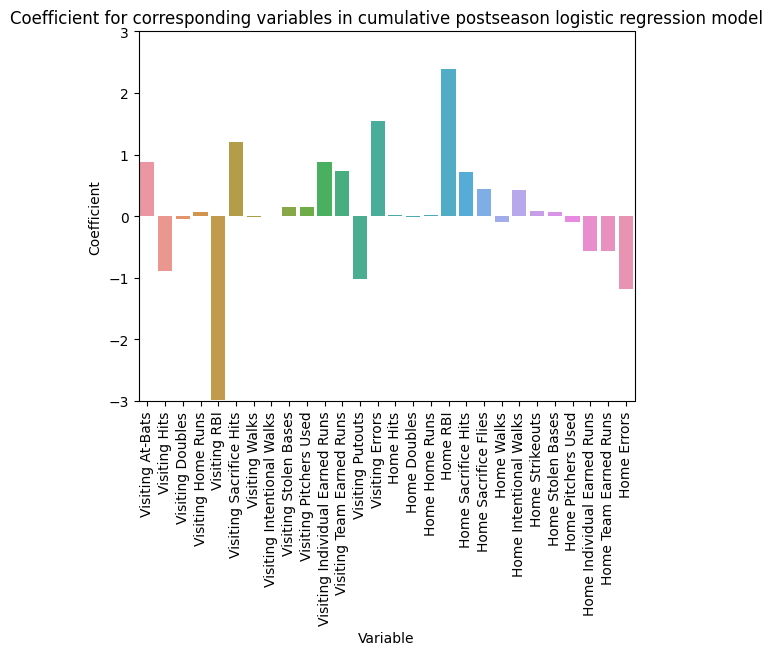

In [ ]:
# plotting coefficient of the logistic regression
model_coef = cumulative_postseason_logreg_matchups.coef_
feature_name = cumulative_postseason_logreg_matchups.feature_names_in_

sns.barplot(x = feature_name, y = model_coef[0])
plt.xticks(rotation=90)
plt.title("Coefficient for corresponding variables in cumulative postseason logistic regression model")
plt.ylabel("Coefficient")
plt.xlabel("Variable")
plt.ylim(-3,3)
plt.show()

Just as we saw in the Regular Season analysis, the RBI and Errors play important Roles in predicting the probability of winning.
By increasing RBI or Errors, the odds of winning approximately double. This validates our findings from the Regular Season analysis.

## **World Series Outcome Prediction**

### **Overview and Model Implementation**

For convenience and ease of access, the postseason seeding as determined by the regular-season matchup data is included below. For reference on the creation of this postseason seeding, refer to the "Regular Season Power Rankings" section of the Regular Season Analysis.

**Power Ranking Expected Seeding:**

NL:


1.   Los Angeles Dodgers
2.   Atlanta Braves
3.   St. Louis Cardinals
4.   New York Mets
5.   Philadelphia Phillies
6.   Milwaukee Brewers 


AL:


1.   Houston Astros
2.   New York Yankees
3.   Cleveland Guardians
4.   Toronto Blue Jays
5.   Seattle Mariners
6.   Tampa Bay Rays



Based on this seeding, we can create a playoff bracket for the 2022 playoffs and use our postseason model to train by matchups. In this way, we aim to predict which team will win the World Series.

We will begin by restating the metrics which we will use as features in our postseason data and extracting the game-by-game for each team for the 2022 season, removing any ties. We then select the subset of this 2022 game-by-game data which matches our list of postseason features. 

In [ ]:
# Restate metrics
postseason_metrics = ["Visiting Team", "Visiting At-Bats", "Visiting Hits", "Visiting Doubles", "Visiting Home Runs", "Visiting RBI", "Visiting Sacrifice Hits", 
                 "Visiting Walks", "Visiting Intentional Walks", "Visiting Stolen Bases", 'Visiting Pitchers Used', 'Visiting Individual Earned Runs',
                 'Visiting Team Earned Runs', 'Visiting Putouts', 'Visiting Errors', "Home Team", "Home Hits", "Home Doubles", "Home Home Runs", "Home RBI", "Home Sacrifice Hits", 
                 "Home Sacrifice Flies", "Home Walks", "Home Intentional Walks", "Home Strikeouts", 
                 "Home Stolen Bases", 'Home Pitchers Used', 'Home Individual Earned Runs', 'Home Team Earned Runs', 'Home Errors']

In [ ]:
# Extract game-by-game data for each team for the 2022 season
df_2022_post = df_2022.copy()

# Remove any ties
df_2022_post = df_2022_post[df_2022_post['Home Score'] != df_2022_post['Visiting Score']]

# Result dataframe generated according to pre-defined features of importance
df_2022_post = df_2022_post[postseason_metrics]

To demonstrate how our postseason analysis will work, the matchup of the Milwaukee Brewers vs. the St. Louis Cardinals is included below. Per our power rankings, the Milwaukee Brewers (6 seed, NL) would be facing the St. Louis Cardinals (3 seed, NL) in the Wild Card round of the playoffs. This 3-game series would take place entirely at home for the St. Louis Cardinals, and thus it would make sense to only consider the home statistics for the St. Louis Cardinals and the away statistics for the Milwaukee Brewers. 

This brings down our original 162 game subset for each team for the regular season to a subset of 81 games which represent either the home or away appearances of that team in the regular season. We believe that this is the best way to encapsulate such advantages or disadvantages that are implicit to the consideration of home-field advantage in the playoffs. 

In [ ]:
# NL Wild Card 1: Brewers vs. Cardinals
NL_WC1_df = df_2022_post.copy()

# Home Team: Cardinals
home_team = "SLN"
# Away Team: Brewers
away_team = "MIL"

# Create Away Features Dataframe
away_drop_cols = [col for col in NL_WC1_df.columns if col.startswith('Home')]
NL_WC1_away = NL_WC1_df.drop(columns=away_drop_cols)
NL_WC1_away = NL_WC1_away[NL_WC1_away['Visiting Team'] == away_team]
NL_WC1_away = NL_WC1_away.groupby(['Visiting Team']).mean().reset_index()
NL_WC1_away = NL_WC1_away.drop(columns=['Visiting Team'])

# Create Home Features Dataframe
home_drop_cols = [col for col in NL_WC1_df.columns if col.startswith('Visiting')]
NL_WC1_home = NL_WC1_df.drop(columns=home_drop_cols)
NL_WC1_home = NL_WC1_home[NL_WC1_home['Home Team'] == home_team]
NL_WC1_home = NL_WC1_home.groupby(['Home Team']).mean().reset_index()
NL_WC1_home = NL_WC1_home.drop(columns=['Home Team'])

# Create combined analysis Dataframe
NL_WC1_away = NL_WC1_away.reset_index(drop=True)
NL_WC1_home = NL_WC1_home.reset_index(drop=True)
NL_WC1_analysis = pd.concat([NL_WC1_away, NL_WC1_home], axis=1)

Now, we will determine the odds of the St. Louis Cardinals winning their Wild Card matchup against the Milwaukee Brewers. 

In [ ]:
WC1_prediction = cumulative_postseason_logreg_matchups.predict_proba(NL_WC1_analysis)

# Determine odds of the home team winning
home_success = WC1_prediction[0][1]
print(home_success)

0.8398462057436609


Interestingly enough, if we switch the "Home" and "Away" classifications here, we find that the Brewers have a much higher chance of winning against the Cardinals. This could mean a few things:


*   The Cardinals are much stronger at home than on the road.
*   The Brewers are much stronger at home than on the road.
*   Being at home in the postseason holds a substantial weight.

We will continue to analyze matchups to determine if the final point here is a significant one.



The code is included below to demonstrate the above point, placing the Milwaukee Brewers as the home team to analyze the change in their odds to win the series.

In [ ]:
# NL Theoretical WC1: Cardinals vs. Brewers
NL_WC1_df = df_2022_post.copy()

# Home Team: Brewers
home_team = "MIL"
# Away Team: Cardinals
away_team = "SLN"

# Create Away Features Dataframe
away_drop_cols = [col for col in NL_WC1_df.columns if col.startswith('Home')]
NL_WC1_away = NL_WC1_df.drop(columns=away_drop_cols)
NL_WC1_away = NL_WC1_away[NL_WC1_away['Visiting Team'] == away_team]
NL_WC1_away = NL_WC1_away.groupby(['Visiting Team']).mean().reset_index()
NL_WC1_away = NL_WC1_away.drop(columns=['Visiting Team'])

# Create Home Features Dataframe
home_drop_cols = [col for col in NL_WC1_df.columns if col.startswith('Visiting')]
NL_WC1_home = NL_WC1_df.drop(columns=home_drop_cols)
NL_WC1_home = NL_WC1_home[NL_WC1_home['Home Team'] == home_team]
NL_WC1_home = NL_WC1_home.groupby(['Home Team']).mean().reset_index()
NL_WC1_home = NL_WC1_home.drop(columns=['Home Team'])

# Create combined analysis Dataframe
NL_WC1_away = NL_WC1_away.reset_index(drop=True)
NL_WC1_home = NL_WC1_home.reset_index(drop=True)
NL_WC1_analysis = pd.concat([NL_WC1_away, NL_WC1_home], axis=1)

Now, we will determine the odds of the Milwaukee Brewers winning this series if they were the home team, to see how their odds of winning the series change.

In [ ]:
WC1_prediction = cumulative_postseason_logreg_matchups.predict_proba(NL_WC1_analysis)

# Determine odds of the home team winning
home_success = WC1_prediction[0][1]
print(home_success)

0.5652184770212336


We will now define a functionalized version of this implementation to faciliate ease of analysis for all playoff matchups.

In [ ]:
def predict_outcome(team_list):
  # Input: list[ (Home Team, Away Team), ] 
  NL_WC_df = df_2022_post.copy()

  WC_list = team_list

  for home_team, away_team in WC_list:
    # Create Away Features Dataframe
    away_drop_cols = [col for col in NL_WC_df.columns if col.startswith('Home')]
    NL_WC_away = NL_WC_df.drop(columns=away_drop_cols)
    NL_WC_away = NL_WC_away[NL_WC_away['Visiting Team'] == away_team]
    NL_WC_away = NL_WC_away.groupby(['Visiting Team']).mean().reset_index()
    NL_WC_away = NL_WC_away.drop(columns=['Visiting Team'])

    # Create Home Features Dataframe
    home_drop_cols = [col for col in NL_WC_df.columns if col.startswith('Visiting')]
    NL_WC_home = NL_WC_df.drop(columns=home_drop_cols)
    NL_WC_home = NL_WC_home[NL_WC_home['Home Team'] == home_team]
    NL_WC_home = NL_WC_home.groupby(['Home Team']).mean().reset_index()
    NL_WC_home = NL_WC_home.drop(columns=['Home Team'])

    # Create combined analysis Dataframe
    NL_WC_away = NL_WC_away.reset_index(drop=True)
    NL_WC_home = NL_WC_home.reset_index(drop=True)
    NL_WC_analysis = pd.concat([NL_WC_away, NL_WC_home], axis=1)

    WC_prediction = cumulative_postseason_logreg_matchups.predict_proba(NL_WC_analysis)

    # Determine odds of the home team winning
    home_success = WC_prediction[0][1]
    print(f"""Away: {away_team} vs Home: {home_team}
  Home Success: {home_success:.4f}
  Away Success: {WC_prediction[0][0]:.4f}\n""")


### **Wild Card Series**

We will run the above prediction code on each of the initial Wild Card matchups. These matchups are as follows:

NL:

Milwaukee Brewers vs. St. Louis Cardinals

Philadelphia Phillies vs. New York Mets

AL:

Tampa Bay Rays vs. Cleveland Guardians

Seattle Mariners vs. Toronto Blue Jays

In [ ]:
predict_outcome([("SLN", "MIL"), ('NYN', 'PHI'), ('CLE','TBA'), ('TOR','SEA')])

Away: MIL vs Home: SLN
  Home Success: 0.8398
  Away Success: 0.1602

Away: PHI vs Home: NYN
  Home Success: 0.8760
  Away Success: 0.1240

Away: TBA vs Home: CLE
  Home Success: 0.5661
  Away Success: 0.4339

Away: SEA vs Home: TOR
  Home Success: 0.2995
  Away Success: 0.7005



From the above analysis, we see that the Home team advances in 3 of the 4 situations. The Seattle Mariners, however, outclass the Toronto Blue Jays despite being the underdog. Surprisingly, this was the actual outcome of the Mariners vs. Blue Jays series last postseason! Additionaly, we find that the series vs. Tampa Bay and Cleveland is a bit of a toss-up. Though Tampa Bay has a slight edge here, Cleveland won in reality. We will now reseed the teams and proceed to the Divisional Series games. 

### **Divisional Series**

We will now analyze the Divisional Round matchups. These are as follows:

NL:

Los Angeles Dodgers vs. New York Mets

Atlanta Braves vs. St. Louis Cardinals

AL:

Houston Astros vs. Seattle Mariners

New York Yankees vs. Cleveland Guardians

In [ ]:
predict_outcome([("LAN", "NYN"), ('ATL', 'SLN'), ('HOU','SEA'), ('NYA','CLE')])

Away: NYN vs Home: LAN
  Home Success: 0.7574
  Away Success: 0.2426

Away: SLN vs Home: ATL
  Home Success: 0.8514
  Away Success: 0.1486

Away: SEA vs Home: HOU
  Home Success: 0.6869
  Away Success: 0.3131

Away: CLE vs Home: NYA
  Home Success: 0.8588
  Away Success: 0.1412



From the above analysis, we see that the Home team is favored in each situation. This could be for a variety of factors. However, because the Divisional Round allows each team at least one opportunity to play at home, we can additionally analyze these new matchups.

In [ ]:
predict_outcome([("NYN", "LAN"), ('SLN', 'ATL'), ('SEA','HOU'), ('CLE','NYA')])

Away: LAN vs Home: NYN
  Home Success: 0.0284
  Away Success: 0.9716

Away: ATL vs Home: SLN
  Home Success: 0.5272
  Away Success: 0.4728

Away: HOU vs Home: SEA
  Home Success: 0.0568
  Away Success: 0.9432

Away: NYA vs Home: CLE
  Home Success: 0.1159
  Away Success: 0.8841



This home-field adjustment does little to help Cleveland, the New York Mets, and Seattle, who are unequivocally outmatched. However, the Atlanta vs. St. Louis matchup flips in favor of St. Louis, suggesting that this series could be an interesting one. However, we will choose St. Louis, Los Angeles, Houston, and the New York Yankees to advance, as these teams will play 3 of the 5 games of this series at home. 

### **League Championship Series**

We will now analyze the League Championship Series matchups. These are as follows:

NL:

Atlanta Braves vs. Los Angeles Dodgers

AL:

New York Yankees vs. Houston Astros

In [ ]:
predict_outcome([("ATL", "LAN"), ('NYA', 'HOU')])

Away: LAN vs Home: ATL
  Home Success: 0.0475
  Away Success: 0.9525

Away: HOU vs Home: NYA
  Home Success: 0.6075
  Away Success: 0.3925



These home teams will play 4 of the 7 games from this series at home. Let us see how reverse matchups pan out before making any conclusions.

In [ ]:
predict_outcome([("LAN", "ATL"), ('HOU', 'NYA')])

Away: ATL vs Home: LAN
  Home Success: 0.7640
  Away Success: 0.2360

Away: NYA vs Home: HOU
  Home Success: 0.5552
  Away Success: 0.4448



Based on these home and away matchups, we can safely conclude that the Houston Astros and the Los Angeles Dodgers will both advance to the World Series. The New York Yankees vs. the Houston Astros will likely be a closer matchup, as these teams are nearly even when playing at the Houston Astros' stadium.

### **World Series**

We will now analyze the World Series Matchup. Home-Field Advantage is based on the best overall season record, which the Dodgers had in 2022.

World Series:

Los Angeles Dodgers vs. Houston Astros

In [ ]:
predict_outcome([('LAN', 'HOU')])

Away: HOU vs Home: LAN
  Home Success: 0.5765
  Away Success: 0.4235



These home teams will play 4 of the 7 games from this series at home. Let us see how reverse matchups pan out before making any conclusions.

In [ ]:
predict_outcome([('HOU', 'LAN')])

Away: LAN vs Home: HOU
  Home Success: 0.0338
  Away Success: 0.9662



Wow. According to our model, the Astros perform very poorly at home. This World Series seems like it will be a lopsided one in favor of the Dodgers. 

# **Final Thoughts**

We see that we were able to successfully predict power ranking metrics for the regular season and game-by-game breakdowns of the postseason. We used these models to predict the World Series winner for 2022 as the Los Angeles Dodgers. 

Future work would aim to analyze matchup statistics in more depth, applying advanced statistical models to determine the length of playoff series in order to more accurately determine a World Series winner. Additionally, future implementations could examine subsets of team data throughout the year to factor in the influence of "hot streaks" or "cold streaks" for a team. 